<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

In [ ]:
!unzip /content/drive/MyDrive/file.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
3import shutil
import glob
import os 
lis = os.listdir('/content/drive/MyDrive/MIRNET/train')
train = os.listdir('/content/drive/MyDrive/content/train_data/images/train')
val = os.listdir('/content/drive/MyDrive/content/train_data/images/val')
for i in lis:
  if i in train:
    os.remove("/content/drive/MyDrive/content/train_data/images/train/"+i)
    shutil.move('/content/drive/MyDrive/MIRNET/train/'+i, '/content/drive/MyDrive/content/train_data/images/train/')
  if i in val:
    os.remove('/content/drive/MyDrive/content/train_data/images/val/'+i)
    shutil.move('/content/drive/MyDrive/MIRNET/train/'+i, '/content/drive/MyDrive/content/train_data/images/val/')
# lis = glob.glob('/content/drive/MyDrive/MIRNET/train/')
# for i in lis:
  

In [ ]:
import cv2
def brightness_normaliztion(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Convert to hsv color system
    h,s,v = cv2.split(hsv) #Divided into each component
    # plt.hist(v.ravel(),256,[0,256]);plt.show()
    result = cv2.equalizeHist(v)
    # plt.hist(result.ravel(),256,[0,256]);plt.show()
    hsv = cv2.merge((h,s,result))
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    # rgb = cv2.detailEnhance(rgb, sigma_s=10, sigma_r=0.15)
    # rgb = cv2.edgePreservingFilter(rgb, flags=1, sigma_s=64, sigma_r=0.2)
    return rgb

In [ ]:
import glob
lis = glob.glob('/content/drive/MyDrive/content/train_data/images/train/*')
for i in lis:
  img = brightness_normaliztion(cv2.imread(i))
  cv2.imwrite('/content/drive/MyDrive/content/train_data/images/entrain/'+i.split('/')[-1],img)

In [ ]:
lis = glob.glob('/content/drive/MyDrive/content/train_data/images/entrain/*')
len(lis)


3000

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-234-gd490bdd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
import csv
fields = ['ImageName', 'nBicycle','nBoat','nBottle','nBus','nCar','nCat','nChair','nCup','nDog','nMotorbike','nPeople','nTable']
csvfile = '/content/drive/MyDrive/firstsubbrightness.csv'
with open(csvfile, 'w') as f:
    write = csv.writer(f)   
    write.writerow(fields)
    f.close

In [ ]:
import glob 
imgs = glob.glob('/content/drive/MyDrive/the-best/test/*')
imgs.sort()
len(imgs)

1800

In [ ]:
import time
t0 = time.time()

In [ ]:
for i in imgs:
  out = !python /content/yolov5/detect.py --weights /content/drive/MyDrive/weghits/best.pt --img 640 --conf 0.25 --source {i}
  h = out[5].split(':')
  h = h[1][8:].split('.')
  h = h[0][:-4].split(',')
  h = h[:-1]
  counter = [i.split('/')[-1],0,0,0,0,0,0,0,0,0,0,0,0]
  for ele in h:
    ans = ele.split(' ')
    if ans[2]== 'bicycle' or ans[2]== 'bicycles':
        counter[1]= ans[1]
    elif ans[2]== 'boat' or ans[2]== 'boats':
        counter[2]= ans[1]
    elif ans[2]== 'bottle' or ans[2]== 'bottles':
        counter[3]= ans[1]
    elif ans[2]== 'bus' or ans[2]== 'buses':
        counter[4]= ans[1]
    elif ans[2]== 'car' or ans[2]== 'cars':
        counter[5]= ans[1]
    elif ans[2]== 'cat' or ans[2]== 'cats':
        counter[6]= ans[1]
    elif ans[2]== 'chair' or ans[2]== 'chairs':
        counter[7]= ans[1]
    elif ans[2]== 'cup' or ans[2]=='cups':
        counter[8]= ans[1]
    elif ans[2]== 'dog' or ans[2]== 'dogs':
        counter[9]= ans[1]
    elif ans[2]== 'motorbike' or ans[2]== 'motorbikes':
        counter[10]= ans[1]
    elif ans[2]== 'person' or ans[2]== 'persons':
        counter[11]= ans[1]
    elif ans[2]== 'table' or ans[2]== 'tables':
        counter[12]= ans[1]   
  with open(csvfile, 'a') as f:
    write = csv.writer(f)   
    write.writerow(counter)

IndexError: ignored

In [ ]:
t1 = time.time()
total = t1-t0
total/60

In [ ]:
out = !python /content/yolov5/detect.py --weights /content/drive/MyDrive/weghits/last.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/imhh.jpg

In [ ]:
outt = !python /content/yolov5/detect.py --weights /content/drive/MyDrive/weghits/last.pt --img 640 --conf 0.25 --source '/content/drive/MyDrive/bata/Test/Images/2019_00256.jpg'

In [ ]:
dic = {}

In [ ]:
import csv
fields = ['ImageName', 'nBicycle','nBoat','nBottle','nBus','nCar','nCat','nChair','nCup','nDog','nMotorbike','nPeople','nTable']
csvfile = '/content/drive/MyDrive/firstsubbrightness.csv'
with open(csvfile, 'w') as f:
    write = csv.writer(f)   
    write.writerow(fields)
    f.close
import argparse
import os
import sys
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn



from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
dic = {}
@torch.no_grad()
def run(
        weights= '/content/yolov5/runs/train/exp5/weights/best.pt',  # model.pt path(s)
        source= '/content/drive/MyDrive/the-best/test/',  # file/dir/URL/glob, 0 for webcam
        data= 'data/coco128.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project= 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup
    dt, seen = [0.0, 0.0, 0.0], 0
    for path, im, im0s, vid_cap, s in dataset:
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(im, augment=augment, visualize=visualize)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i} '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            name = s.split('/')[-1]
            name = name.split(':')[0]
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            counter = [name,0,0,0,0,0,0,0,0,0,0,0,0]
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()
                dic[name]= det.tolist()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
                    counter[int(c)+1]=int(n)
                # print(counter)   
                    # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'{txt_path}.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)
            with open(csvfile, 'a') as f:
              write = csv.writer(f)   
              write.writerow(counter)
            # Stream results
            im0 = annotator.result()
            if view_img:
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f'{s}Done. ({t3 - t2:.3f}s)')

    # Print results
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights)  # update model (to fix SourceChangeWarning)
run()
# print(dic)

In [ ]:
dic

{'2019_00308.jpg': [[66.0, 440.0, 591.0, 758.0, 0.8919649124145508, 0.0]]}

In [ ]:
import pickle

# Store data (serialize)
with open('/content/drive/MyDrive/enfinalboxes.pickle', 'wb') as handle:
    pickle.dump(dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
# with open('filename.pickle', 'rb') as handle:
#     unserialized_data = pickle.load(handle)

# print(your_data == unserialized_data)

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-184-g9d8ed37 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

 71% 117M/166M [00:06<00:02, 18.3MB/s]
Traceback (most recent call last):
  File "/content/yolov5/utils/downloads.py", line 42, in safe_download
    torch.hub.download_url_to_file(url, str(file), progress=LOGGER.level <= logging.INFO)
  File "/usr/local/lib/python3.7/dist-packages/torch/hub.py", line 479, in download_url_to_file
    buffer = u.read(8192)
  File "/usr/lib/python3.7/http/client.py", line 465, in read
    n = self.readinto(b)
  File "/usr/lib/python3.7/http/client.py", line 509, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.7/socket.py", line 589, i

## COCO test
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 614 --batch 32 --epochs 90 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=32, imgsz=614, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 18 (delta 13), reused 18 (delta 13), pack-reused 0
Unpacking objects: 100% (18/18), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      docker     -> origin/docker
   fd840d5..3a87c37  v7.0       -> origin/v7.0
github: up to date with https://github.com/ult

In [ ]:
import shutil
shutil.move('/content/yolov5/runs/train/exp5/weights', '/content/drive/MyDrive/weghit/')

In [ ]:
import os
import glob

anotaion = glob.glob('/content/content/train_data/labels/val/*')
train  = os.listdir('/content/content/train_data/labels/train')
import shutil
for i in anotaion:
  file  = i.split('/')[-1]
  if file not in train:
    shutil.move(i, '/content/content/train_data/labels/new val')

In [ ]:
import cv2

In [ ]:
import pickle
infile = open('/content/drive/MyDrive/mydataset.pickle','rb')
data = pickle.load(infile)
infile.close()

In [ ]:
data[800][2]

'2019_06926.jpg'

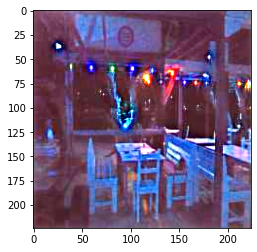

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(data[800][0])
plt.show()

In [ ]:
!rm -rf /content/yolov5

In [ ]:
shutil.move('/content/content/train_data/labels', '/content/drive/MyDrive/brightnessNormalization')

'/content/drive/MyDrive/brightnessNormalization/labels'

In [ ]:
import os
import glob

train  = os.listdir('/content/content/train_data/labels/train')
train = [x.split('.')[0] for x in train]
img = os.listdir('/content/drive/MyDrive/brightnessNormalization/train')
import shutil
for i in img:
  file  = i.split('.')[0]
  if file not in train:
    shutil.move('/content/drive/MyDrive/brightnessNormalization/train/'+i, '/content/drive/MyDrive/brightnessNormalization/val')
  else:
    shutil.move('/content/drive/MyDrive/brightnessNormalization/train/'+i, '/content/drive/MyDrive/brightnessNormalization/tt')


In [ ]:
import shutil
for i in anotaion:
  file  = i.split('/')[-1]
  if file not in train:
    shutil.move(i, '/content/content/train_data/labels/new val')

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<p align="left"><img width="900" alt="Weights & Biases dashboard" src="https://user-images.githubusercontent.com/26833433/135390767-c28b050f-8455-4004-adb0-3b730386e2b2.png"></p>

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.

> <img src="https://user-images.githubusercontent.com/26833433/131255960-b536647f-7c61-4f60-bbc5-cb2544d71b2a.jpg" width="700">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/131256748-603cafc7-55d1-4e58-ab26-83657761aed9.jpg" width="700">  
`test_batch0_labels.jpg` shows val batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/131256752-3f25d7a5-7b0f-4bb3-ab78-46343c3800fe.jpg" width="700">  
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Reproduce
for x in 'yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5n.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=speed, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 3.87M/3.87M [00:00<00:00, 78.4MB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients

Dataset not found ⚠, missing paths ['/content/datasets/coco/val2017.txt']
100% 67.7M/67.7M [00:00<00:00, 273MB/s]
Unzipping ../datasets/coco2017labels.zip...
Unzipping ../datasets/coco/images/val2017.zip...
Unzipping ../datasets/coco/images/test2017.zip...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "val.py", li

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

In [ ]:
# CI Checks
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories
rm -rf runs  # remove runs/
for m in yolov5n; do  # models
  python train.py --img 64 --batch 32 --weights $m.pt --epochs 1 --device 0  # train pretrained
  python train.py --img 64 --batch 32 --weights '' --cfg $m.yaml --epochs 1 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python val.py --weights $m.pt --device $d # val official
    python val.py --weights runs/train/exp/weights/best.pt --device $d # val custom
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # build PyTorch model
  python models/tf.py --weights $m.pt  # build TensorFlow model
  python export.py --img 64 --batch 1 --weights $m.pt --include torchscript onnx  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
results = profile(input=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 64, 64, 32, 16], ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # batch, model
  !python train.py --batch {b} --weights {m}.pt --data VOC.yaml --epochs 50 --img 512 --hyp hyp.VOC.yaml --project VOC --name {m} --cache

In [ ]:
# TensorRT 
# https://docs.nvidia.com/deeplearning/tensorrt/install-guide/index.html#installing-pip
!pip install -U nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com  # install
!python export.py --weights yolov5s.pt --include engine --imgsz 640 640 --device 0  # export
!python detect.py --weights yolov5s.engine --imgsz 640 640 --device 0  # inference